# Pymaceuticals Inc.

### Analysis
- My first observation was that 51% of the mice were males and 49% were females.
- Also, Capomulin as well as Ramicane both had positive effects in terms of reducing the size of the tumor.
- The correlation between mouse weight, and average tumor volume is 0.84. It is a positive correlation, when the mouse weight increases the average tumor volume also increases.


 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
sns.set_style('whitegrid')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_dataframe["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = combined_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

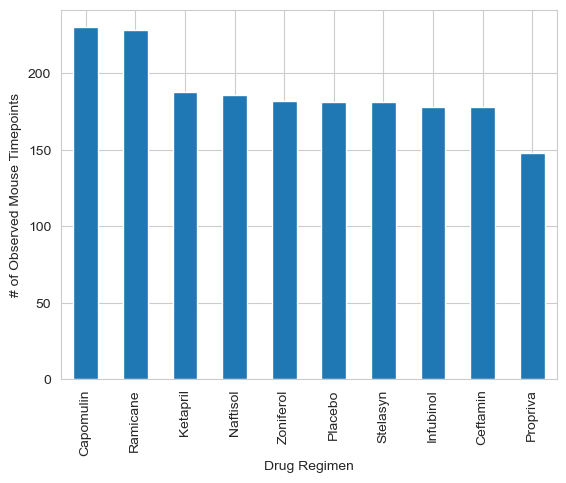

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_dataframe["Drug Regimen"].value_counts()
first_bar_chart = mice_count.plot.bar(color='tab:blue') 

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


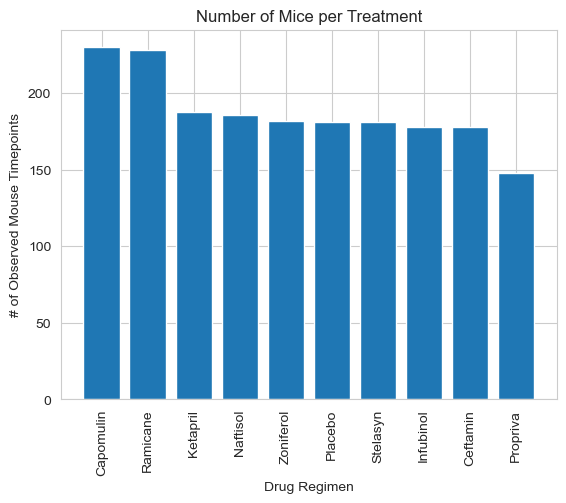

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Setting the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

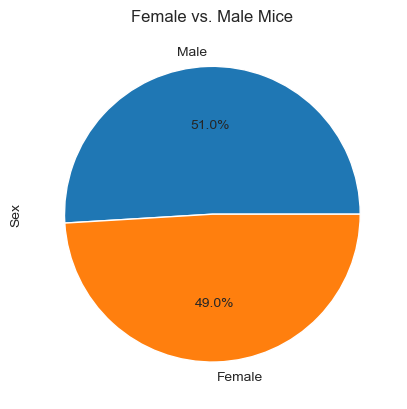

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_dataframe["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

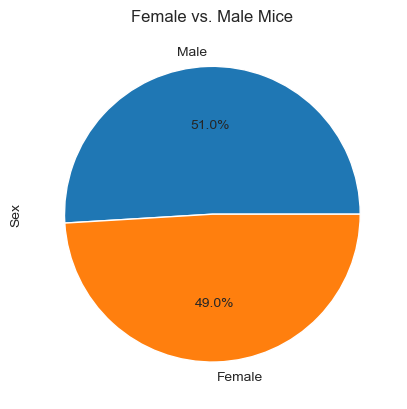

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.8989395, 50.700902]
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_dataframe.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoints, clean_dataframe, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the four treatment regimens
capomulin_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculate the sum of tumor volumes for each regimen
capomulin_sum = capomulin_tumor_vol.sum()
ramicane_sum = ramicane_tumor_vol.sum()
infubinol_sum = infubinol_tumor_vol.sum()
ceftamin_sum = ceftamin_tumor_vol.sum()

# Print the total tumor volume for each regimen
print("Total Tumor Volume for Capomulin:", capomulin_sum)
print("Total Tumor Volume for Ramicane:", ramicane_sum)
print("Total Tumor Volume for Infubinol:", infubinol_sum)
print("Total Tumor Volume for Ceftamin:", ceftamin_sum)

Total Tumor Volume for Capomulin: 916.68919298
Total Tumor Volume for Ramicane: 904.78476071
Total Tumor Volume for Infubinol: 1454.45614463
Total Tumor Volume for Ceftamin: 1443.8494206300002


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Filter the final_tumor_vol DataFrame for the current treatment regimen
    treatment_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles (Q1, Q2, Q3) for the current treatment regimen
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate the IQR (interquartile range) for the current treatment regimen
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify potential outliers for the current treatment regimen
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Display the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


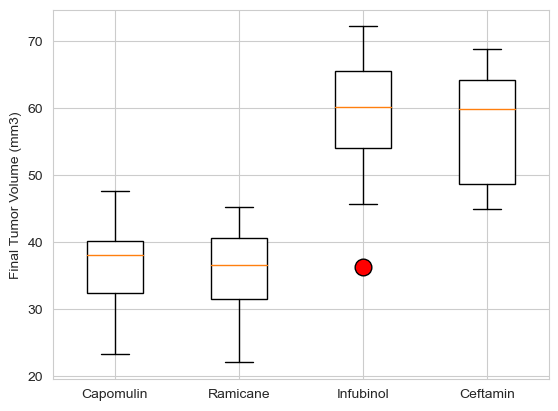

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a DataFrame with the tumor volume data for each treatment regimen
tumor_vol_df = pd.DataFrame({'Treatment': treatments,
                             'Tumor Volume': tumor_vol_data})

# Create the box plot with red outliers
plt.boxplot(tumor_vol_data, patch_artist=True, boxprops=dict(facecolor='white'), 
            capprops=dict(color='black'), whiskerprops=dict(color='black'), 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=12))

# Set the x-axis tick labels
plt.xticks(range(1, len(treatments) + 1), treatments)

# Set the y-axis label
plt.ylabel('Final Tumor Volume (mm3)')
# Show the plot
plt.show()

## Line and Scatter Plots

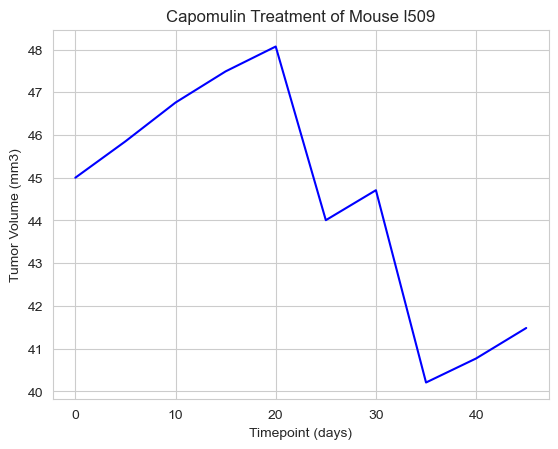

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Select mouse ID
mouse_id = 'l509'

# Filter the DataFrame to include data for the selected mouse
selected_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(selected_mouse_df['Timepoint'], selected_mouse_df['Tumor Volume (mm3)'], color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

# Show the plot
plt.show()

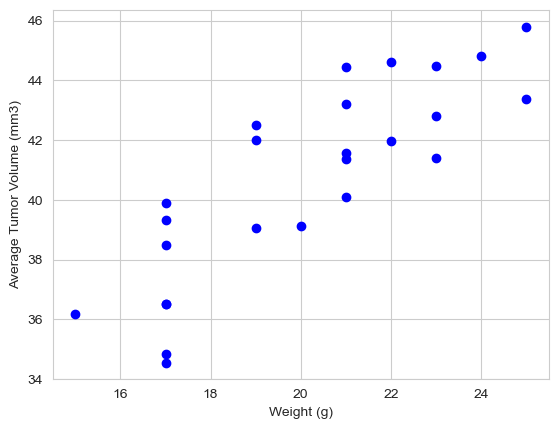

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only mice treated with Capomulin
capomulin_df = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate the average tumor volume for each mouse
grouped_df = capomulin_df.groupby('Mouse ID')
avg_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()

# Create a new DataFrame with the average tumor volume and corresponding mouse weight for each mouse
scatter_df = pd.DataFrame({
    'Mouse Weight': grouped_df['Weight (g)'].first(),
    'Average Tumor Volume': avg_tumor_volume
})

# Plot the scatter plot
plt.scatter(scatter_df['Mouse Weight'], scatter_df['Average Tumor Volume'],color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Set the title


# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


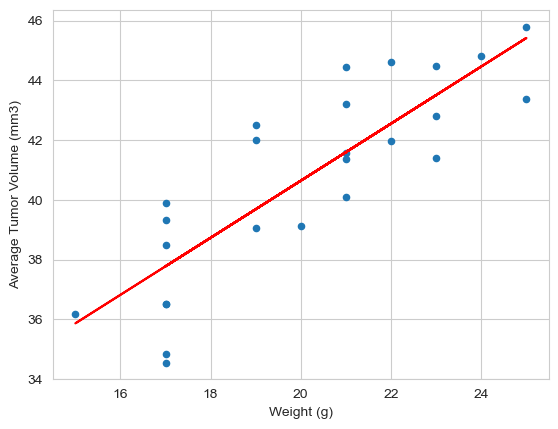

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coef, _ = st.pearsonr(scatter_df['Mouse Weight'], scatter_df['Average Tumor Volume'])
print("The correlation between mouse weight and the average tumor volume is: {:.2f}".format(correlation_coef))
# Perform linear regression
slope, intercept, rvalue, pvalue, _ = st.linregress(scatter_df['Mouse Weight'], scatter_df['Average Tumor Volume'])

# Create the regression line data
regression_line = slope * scatter_df['Mouse Weight'] + intercept

# Plot the scatter plot with regression line
scatter_df.plot.scatter(x='Mouse Weight', y='Average Tumor Volume')
plt.plot(scatter_df['Mouse Weight'], regression_line, color='red')

# Set the x-axis and y-axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()